<a href="https://colab.research.google.com/github/sakshik0524/Encryptix_task1/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALLATION

In [30]:
# Install necessary libraries
!pip install pandas numpy scikit-learn joblib


In [31]:
from google.colab import files
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib


# Files Uploading

In [8]:
# Import the necessary modules
# from google.colab import drive
# from google.colab import files

# # Mount Google Drive
# try:
#     drive.mount('/content/drive', force_remount=True)
# except ValueError as e:
#     print(f"Error mounting Google Drive: {e}")

# # Upload multiple files
# uploaded = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# import pandas as pd

# description_path = '/content/drive/My Drive/description.txt'
# train_data_path = '/content/drive/My Drive/train_data.txt'
# test_data_path = '/content/drive/My Drive/test_data.txt'
# test_data_solution_path = '/content/drive/My Drive/test_data_solution.txt'


# Preprocessing and Extraction

In [32]:
from google.colab import drive
import pandas as pd
import re
import string

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
train_data_path = '/content/drive/My Drive/train_data.txt'
test_data_path = '/content/drive/My Drive/test_data.txt'
test_data_solution_path = '/content/drive/My Drive/test_data_solution.txt'

# Load the data into pandas DataFrames
train_data = pd.read_csv(train_data_path, delimiter='\t', header=None, names=['plot_summary'])
test_data = pd.read_csv(test_data_path, delimiter='\t', header=None, names=['plot_summary'])
test_data_solution = pd.read_csv(test_data_solution_path, delimiter='\t', header=None, names=['genre'])

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Function to extract plot summary and genre from training data
def extract_plot_genre(data):
    data[['index', 'title', 'genre', 'plot_summary']] = data['plot_summary'].str.extract(r'(\d+) ::: (.+) ::: (.+) ::: (.+)', expand=True)
    data = data.drop(columns=['index', 'title'])
    return data

# Function to extract plot summary from test data
def extract_plot(data):
    data[['index', 'title', 'plot_summary']] = data['plot_summary'].str.extract(r'(\d+) ::: (.+) ::: (.+)', expand=True)
    data = data.drop(columns=['index', 'title'])
    return data

# Extract plot summary and genre from training data
train_data = extract_plot_genre(train_data)

# Extract plot summary from test data
test_data = extract_plot(test_data)

# Extract genre from test data solution
test_data_solution[['index', 'title', 'genre', 'plot_summary']] = test_data_solution['genre'].str.extract(r'(\d+) ::: (.+) ::: (.+) ::: (.+)', expand=True)
test_data_solution = test_data_solution.drop(columns=['index', 'title', 'plot_summary'])

# Debugging step: Show first few rows of each dataframe
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())
print("\nTest Data Solution:")
print(test_data_solution.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data:
                                        plot_summary     genre
0  Listening in to a conversation between his doc...     drama
1  A brother and sister with a past incestuous re...  thriller
2  As the bus empties the students for their fiel...     adult
3  To help their unemployed father make ends meet...     drama
4  The film's title refers not only to the un-rec...     drama

Test Data:
                                        plot_summary
0  L.R. Brane loves his life - his car, his apart...
1  Spain, March 1964: Quico is a very naughty chi...
2  One year in the life of Albin and his family o...
3  His father has died, he hasn't spoken with his...
4  Before he was known internationally as a marti...

Test Data Solution:
         genre
0     thriller
1       comedy
2  documentary
3        drama
4        drama


# Training Data

In [33]:
# Drop rows with missing values in the 'plot_summary' or 'genre' column
train_data = train_data.dropna(subset=['plot_summary', 'genre'])

# Ensure there are no remaining NaN values
train_data = train_data.fillna('')

# Debugging step: Check for any empty summaries after dropping NaNs
empty_summaries = train_data[train_data['plot_summary'].str.strip() == '']
print(f"Number of empty plot summaries in training data after dropping NaNs: {len(empty_summaries)}")


Number of empty plot summaries in training data after dropping NaNs: 0


# Preprocessing Text

In [34]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text


In [35]:
# Apply preprocessing
train_data['plot_summary'] = train_data['plot_summary'].apply(preprocess_text)
test_data['plot_summary'] = test_data['plot_summary'].apply(preprocess_text)

# Debugging step: Check for any empty summaries after preprocessing
empty_summaries = train_data[train_data['plot_summary'].str.strip() == '']
print(f"Number of empty plot summaries in training data after preprocessing: {len(empty_summaries)}")

# Remove any empty documents
train_data = train_data[train_data['plot_summary'].str.strip() != '']

Number of empty plot summaries in training data after preprocessing: 0


# TF-IDF Technique

In [36]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['plot_summary'])

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(test_data['plot_summary'])


In [37]:
# Ensure no NaN values in the genre column
assert not train_data['genre'].isnull().any(), "NaN values found in the genre column"

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, train_data['genre'])


LogisticRegression(max_iter=1000)

Accuracy: 0.5889667896678967


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.47      0.28      0.35      1314
       adult       0.63      0.25      0.36       590
   adventure       0.58      0.15      0.24       775
   animation       0.51      0.05      0.09       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.59      0.56      7446
       crime       0.37      0.03      0.06       505
 documentary       0.68      0.86      0.76     13096
       drama       0.55      0.78      0.64     13612
      family       0.49      0.09      0.15       783
     fantasy       0.59      0.03      0.06       322
   game-show       0.89      0.50      0.64       193
     history       0.00      0.00      0.00       243
      horror       0.64      0.56      0.60      2204
       music       0.65      0.47      0.55       731
     musical       0.33      0.02      0.03       276
     mystery       0.40      0.01      0.01       318
        news       0.73    

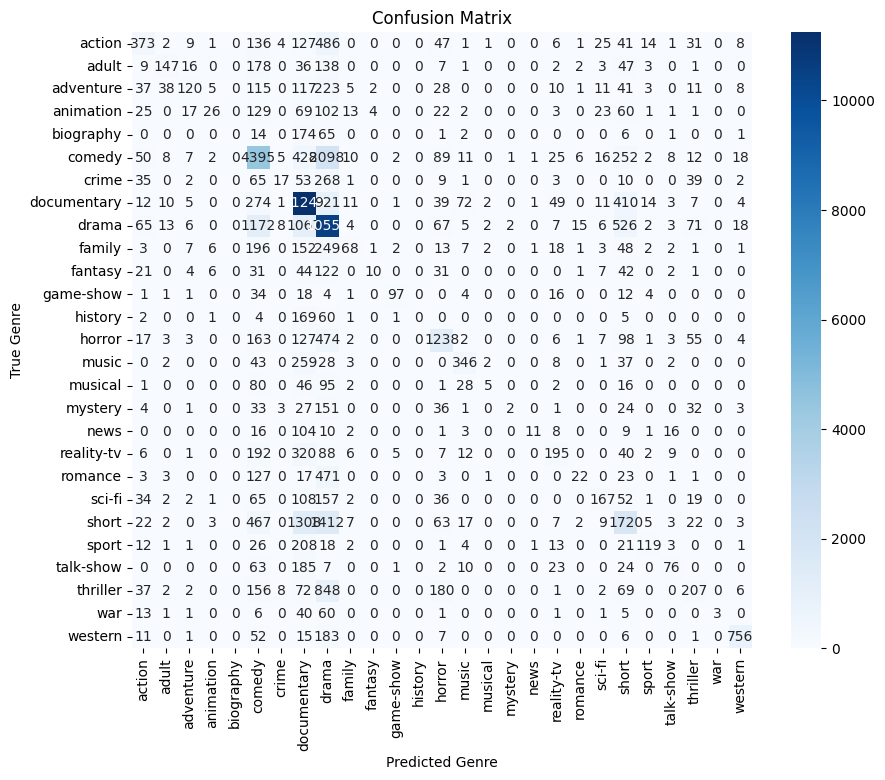

In [38]:
# Step 1: Evaluate on Test Dataset
y_pred = logreg.predict(X_test_tfidf) # Changed X_test to X_test_tfidf

# Step 1: Evaluate on Test Dataset
accuracy = accuracy_score(test_data_solution['genre'], y_pred)
print("Accuracy:", accuracy)
print(classification_report(test_data_solution['genre'], y_pred))

# Step 2: Cross-Validation (Optional)
# Perform cross-validation during training

# Step 3: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
conf_mat = confusion_matrix(test_data_solution['genre'], y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train_tfidf, train_data['genre'], cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean of cross-validation scores
print("Mean Cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.58480125 0.58738357 0.58646131 0.58194227 0.59204944]
Mean Cross-validation score: 0.5865275670836


In [40]:
# Save the trained model and TF-IDF vectorizer
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Download the saved model and vectorizer
files.download('logreg_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Test with Custom Example

In [41]:
# Load the saved model and TF-IDF vectorizer
logreg = joblib.load('logreg_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example usage: Predict genres for new plot summaries
new_plot_summaries = [
    "There's been a theft and murder in the palace. The police were called to find the culprit",
    "The host entered and everybody was joyous and happy cheering. The he cracked a joke and everyone blast into laughter."
]

# Preprocess the new plot summaries
new_plot_summaries_preprocessed = [preprocess_text(summary) for summary in new_plot_summaries]

# Transform the new plot summaries using the TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform(new_plot_summaries_preprocessed)

# Predict genres for the new plot summaries
new_predictions = logreg.predict(X_new_tfidf)

# Expected genres for the test plot summaries
expected_genres = ['crime', 'comedy']

# Print the predicted genres and compare with the expected genres
for summary, prediction, expected_genre in zip(new_plot_summaries, new_predictions, expected_genres):
    print(f"Plot Summary: {summary}")
    print(f"Predicted Genre: {prediction}")
    print(f"Expected Genre: {expected_genre}")
    print()


Plot Summary: There's been a theft and murder in the palace. The police were called to find the culprit
Predicted Genre: crime
Expected Genre: crime

Plot Summary: The host entered and everybody was joyous and happy cheering. The he cracked a joke and everyone blast into laughter.
Predicted Genre: comedy
Expected Genre: comedy



# Extra Information for Debugging

In [42]:
# Display the first few rows of the training data to inspect the column names
print(train_data.head())


                                        plot_summary     genre
0  listening in to a conversation between his doc...     drama
1  a brother and sister with a past incestuous re...  thriller
2  as the bus empties the students for their fiel...     adult
3  to help their unemployed father make ends meet...     drama
4  the film s title refers not only to the un rec...     drama


In [29]:
# Load the train dataset
# train_data = pd.read_csv('train_data.txt', sep=' ::: ', engine='python', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

# # Get unique genres
# unique_genres = train_data['GENRE'].unique()

# # Print unique genres
# print(unique_genres)
